<a href="https://colab.research.google.com/github/tekgulburak/Stock-Trading-Gym-Apple-Data-/blob/main/Stock_Trading_Gym_Apple_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [72]:
!pip install tensorflow

In [73]:
!pip install stable-baselines3 gym

In [74]:
!pip install gym-anytrading

In [75]:
#upload gym requirements
import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

#upload stable baselines for reinforcement learning

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [105]:
df=pd.read_csv("/content/AAPL.csv")

In [107]:
df=df.drop("Unnamed: 0",axis=1)
df

,Date,Open,High,Low,Close,Volume
0,1998-01-02,13.63,16.2500,13.5000,16.25,6411700.0
1,1998-01-05,16.50,16.5600,15.1900,15.88,5820300.0
2,1998-01-06,15.94,20.0000,14.7500,18.94,16182800.0
3,1998-01-07,18.81,19.0000,17.3100,17.50,9300200.0
4,1998-01-08,17.44,18.6200,16.9400,18.19,6910900.0
...,...,...,...,...,...,...
5250,2018-11-12,199.00,199.8500,193.7900,194.17,51135518.0
5251,2018-11-13,191.63,197.1800,191.4501,192.23,46882936.0
5252,2018-11-14,193.90,194.4800,185.9300,186.80,60800957.0
5253,2018-11-15,188.39,191.9700,186.9000,191.41,46478801.0


In [108]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1998-01-02,13.63,16.25,13.50,16.25,6411700.0
1,1998-01-05,16.50,16.56,15.19,15.88,5820300.0
2,1998-01-06,15.94,20.00,14.75,18.94,16182800.0
3,1998-01-07,18.81,19.00,17.31,17.50,9300200.0
4,1998-01-08,17.44,18.62,16.94,18.19,6910900.0


In [109]:
df["Date"]=pd.to_datetime(df["Date"])
#df=df.drop("Unnamed: 0",axis=1)

In [110]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1998-01-02,13.63,16.25,13.50,16.25,6411700.0
1,1998-01-05,16.50,16.56,15.19,15.88,5820300.0
2,1998-01-06,15.94,20.00,14.75,18.94,16182800.0
3,1998-01-07,18.81,19.00,17.31,17.50,9300200.0
4,1998-01-08,17.44,18.62,16.94,18.19,6910900.0


In [111]:
df.dtypes #check type of date

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [112]:
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1998-01-02,13.63,16.25,13.50,16.25,6411700.0
1998-01-05,16.50,16.56,15.19,15.88,5820300.0
1998-01-06,15.94,20.00,14.75,18.94,16182800.0
1998-01-07,18.81,19.00,17.31,17.50,9300200.0
1998-01-08,17.44,18.62,16.94,18.19,6910900.0


In [113]:
df.sort_values("Date",ascending=True,inplace=True)


In [114]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1998-01-02,13.63,16.25,13.50,16.25,6411700.0
1998-01-05,16.50,16.56,15.19,15.88,5820300.0
1998-01-06,15.94,20.00,14.75,18.94,16182800.0
1998-01-07,18.81,19.00,17.31,17.50,9300200.0
1998-01-08,17.44,18.62,16.94,18.19,6910900.0


In [115]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [116]:
#df.rename(columns={df.columns[3]:"Close"},inplace=True)
env = gym.make("stocks-v0", df=df, frame_bound=(10, len(df)-1), window_size=10)


In [117]:
env.signal_features

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 16.25,   0.  ],
       [ 15.88,  -0.37],
       [ 18.94,   3.06],
       ...,
       [192.23,  -1.94],
       [186.8 ,  -5.43],
       [191.41,   4.61]], dtype=float32)

In [118]:
env.signal_features.shape

(5254, 2)

In [119]:
env.action_space

Discrete(2)

In [120]:
df.shape

(5255, 5)

# Yeni Bölüm

info: {'total_reward': 473.1831121444702, 'total_profit': 5.891285913990392e-08, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


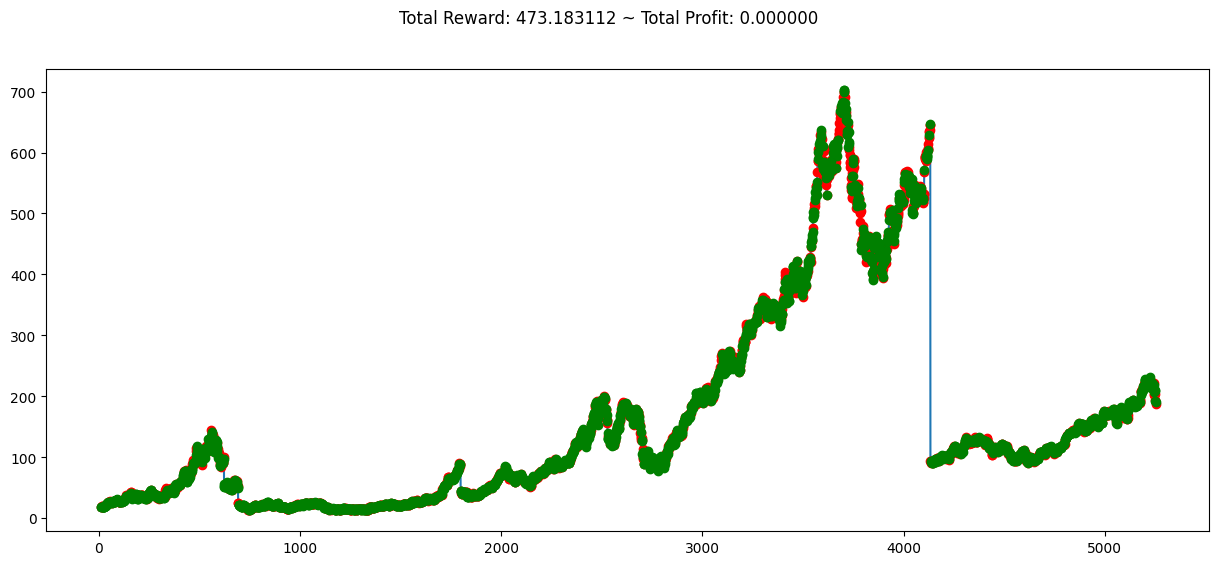

In [121]:
state = env.reset()

while True:
    action = env.action_space.sample()
    new_state, reward,_,done,info = env.step(action)
    if done:
        print("info:", info)
        break

plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.show()

In [122]:
pip install finta

In [123]:
from finta import TA

In [124]:
df["Volume"]=df["Volume"].astype(str).apply(lambda x:float(x.replace(",","")))


In [125]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [126]:
df["SMA"]=TA.SMA(df,12)
df["RSI"]=TA.RSI(df)
df["OBV"]=TA.OBV(df)
df.fillna(0,inplace=True)

In [127]:
df.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
1998-01-02,13.63,16.25,13.50,16.25,6411700.0,0.000000,0.000000,0.0
1998-01-05,16.50,16.56,15.19,15.88,5820300.0,0.000000,0.000000,-5820300.0
1998-01-06,15.94,20.00,14.75,18.94,16182800.0,0.000000,89.905561,10362500.0
1998-01-07,18.81,19.00,17.31,17.50,9300200.0,0.000000,61.764021,1062300.0
1998-01-08,17.44,18.62,16.94,18.19,6910900.0,0.000000,67.081150,7973200.0
1998-01-09,18.12,19.37,17.50,18.19,7915600.0,0.000000,67.081150,0.0
1998-01-12,17.44,18.62,17.12,18.25,4610700.0,0.000000,67.536424,12583900.0
1998-01-13,18.62,19.62,18.50,19.50,5686200.0,0.000000,75.224182,18270100.0
1998-01-14,19.87,19.94,19.25,19.75,5261300.0,0.000000,76.426560,23531400.0


In [128]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
class my_custom_env(StocksEnv):
  _process_data=add_signals

env2=my_custom_env(df=df,window_size=12,frame_bound=(12,50))


In [130]:
env2.signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.35000000e+01,  6.41170000e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.51900000e+01,  5.82030000e+06,  0.00000000e+00,
         0.00000000e+00, -5.82030000e+06],
       [ 1.47500000e+01,  1.61828000e+07,  0.00000000e+00,
         8.99055614e+01,  1.03625000e+07],
       [ 1.73100000e+01,  9.30020000e+06,  0.00000000e+00,
         6.17640209e+01,  1.06230000e+06],
       [ 1.69400000e+01,  6.91090000e+06,  0.00000000e+00,
         6.70811504e+01,  7.97320000e+06],
       [ 1.75000000e+01,  7.91560000e+06,  0.00000000e+00,
         6.70811504e+01,  0.00000000e+00],
       [ 1.71200000e+01,  4.61070000e+06,  0.00000000e+00,
         6.75364245e+01,  1.25839000e+07],
       [ 1.85000000e+01,  5.68620000e+06,  0.00000000e+00,
         7.52241824e+01,  1.82701000e+07],
       [ 1.92500000e+01,  5.26130000e+06,  0.00000000e+00,
         7.64265602e+01,  2.35314000e+07],
       [ 1.86200000e+01,  4.99350000e+06,  0.00000000e+00,
         6.84169828e+01

In [131]:
env_maker=lambda:env2
env=DummyVecEnv([env_maker])

In [132]:
model=A2C("MlpPolicy",env,verbose=1)
model.learn(total_timesteps=400000)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
|    value_loss         | 0.00295   |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 446      |
|    iterations         | 44400    |
|    time_elapsed       | 497      |
|    total_timesteps    | 222000   |
| train/                |          |
|    entropy_loss       | -0.0017  |
|    explained_variance | 0.74     |
|    learning_rate      | 0.0007   |
|    n_updates          | 44399    |
|    policy_loss        | 6.55e-06 |
|    value_loss         | 0.083    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 446       |
|    iterations         | 44500     |
|    time_elapsed       | 498       |
|    total_timesteps    | 222500    |
| train/                |           |
|    entropy_loss       | -0.00219  |
|    explained_variance | 0.995     |
|    learning_rat

In [133]:
env = my_custom_env(df=df, window_size=12, frame_bound=(80, 250))
obs = env.reset()
obs=obs[0]
while True:
    obs=obs[np.newaxis,...]
    action, _states = model.predict(obs)
    obs, rewards,terminated,done,info = env.step(action)
    if done:
        print("info", info)
        break


info {'total_reward': 17.269999999999996, 'total_profit': 0.9542297746160676, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


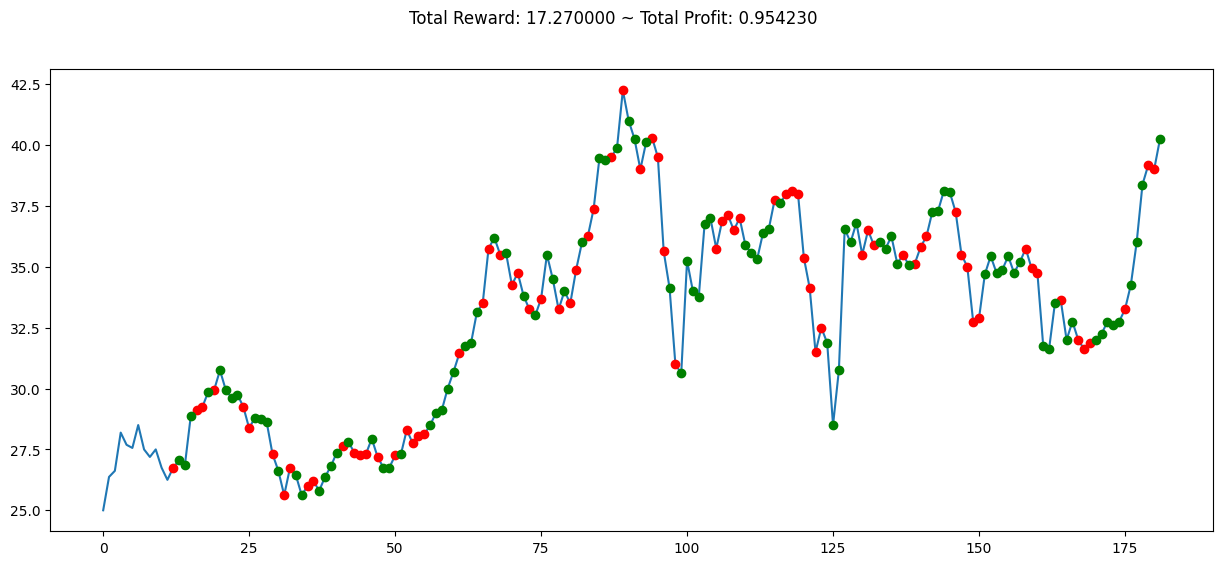

In [134]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()